## Introduction

This notebook runs the DP stochastic evaluator in Burdock on aggregations available in Yarrow. The Burdock evaluator implements the privacy promise test by repeatedly running the same aggregation multiple times on neighboring datasets and check the returning probability distribution of responses. 

In [1]:
import os
import yarrow
import dp_verification as dp
import aggregation as agg

### PUMS Dataset

In [2]:
dataset_root = os.getenv('DATASET_ROOT', '/home/ankit/Documents/github/datasets/')
test_csv_path = dataset_root + 'data/PUMS_california_demographics_1000/data.csv'

### Loading the DP Evaluation and aggregation library

In [3]:
dv = dp.DPVerification(dataset_size=1000)
ag = agg.Aggregation(t=1, repeat_count=10000)

Loaded 1000 records


## Neighbor repeated query test

* Randomly pick a record to remove and create neighboring PUMS datasets D1 and D2
* Repeatedly apply the aggregation on D1 and D2
* Compute histogram of repeated aggregation responses of D1 and D2
* Check the differential privacy condition on the probability distribution of responses based on histogram results
* Return true / false based on whether probability distribution of D1 bounded by D2 across all bins and vice versa

### Yarrow DP Mean

Length of D1:  1000  Length of D2:  999
Sum of frequencies in D1 Histogram:  10000
Sum of frequencies in D2 Histogram:  10000
DP Predicate Test: True 



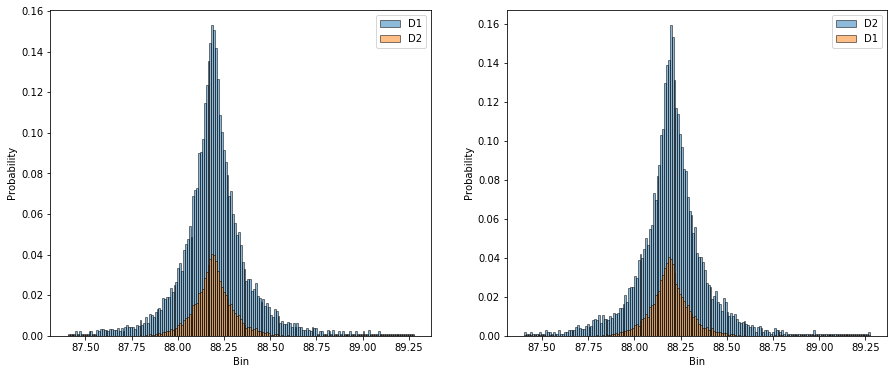

--- 35.928666830062866 seconds ---


In [4]:
import time
start_time = time.time()
dv.yarrow_test(test_csv_path, 
               yarrow.dp_mean,
               'income',
               float,
               epsilon=dv.epsilon,
               minimum=0,
               maximum=100,
               num_records=1000
              )
print("--- %s seconds ---" % (time.time() - start_time))

### Yarrow DP Variance

Length of D1:  1000  Length of D2:  999
Sum of frequencies in D1 Histogram:  10000
Sum of frequencies in D2 Histogram:  10000
DP Predicate Test: True 



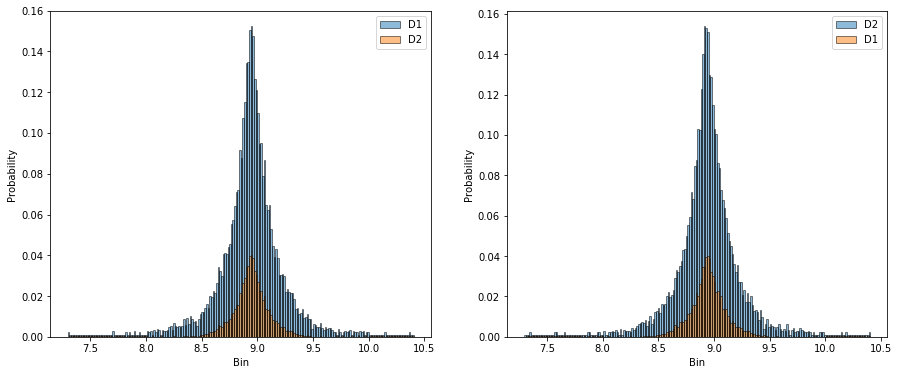

--- 37.361594676971436 seconds ---


In [5]:
start_time = time.time()
dv.yarrow_test(test_csv_path,
               yarrow.dp_variance,
               'educ',
               int,
               epsilon=dv.epsilon,
               minimum=0,
               maximum=12,
               num_records=1000
              )
print("--- %s seconds ---" % (time.time() - start_time))

### Yarrow DP Moment

Length of D1:  1000  Length of D2:  999
Sum of frequencies in D1 Histogram:  10000
Sum of frequencies in D2 Histogram:  10000
DP Predicate Test: True 



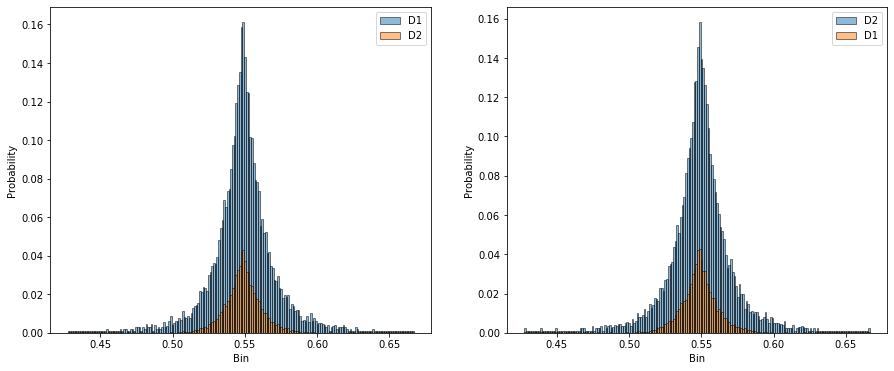

--- 38.80264449119568 seconds ---


In [6]:
start_time = time.time()
dv.yarrow_test(test_csv_path,
               yarrow.dp_moment_raw,
               'married',
               float,
               epsilon=.15,
               minimum=0,
               maximum=12,
               num_records=1000000,
               order = 3
              )
print("--- %s seconds ---" % (time.time() - start_time))

### Yarrow DP Covariance

Length of D1:  1000  Length of D2:  999
Sum of frequencies in D1 Histogram:  10000
Sum of frequencies in D2 Histogram:  10000
DP Predicate Test: True 



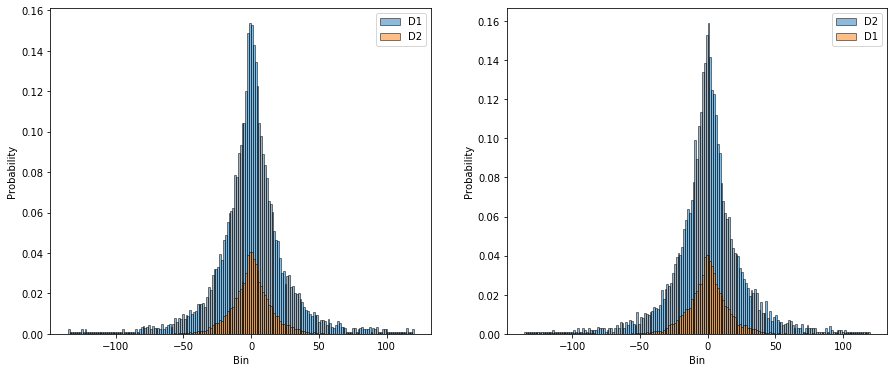

--- 68.77797818183899 seconds ---


In [7]:
start_time = time.time()
dv.yarrow_test(test_csv_path,
               yarrow.dp_covariance,
               'married',
               int,
               'sex',
               int,
               epsilon=.15,
               minimum_x=0,
               maximum_x=1,
               minimum_y=0,
               maximum_y=1,
               num_records=1000
              )
print("--- %s seconds ---" % (time.time() - start_time))